<a href="https://colab.research.google.com/github/Renatolopo/sistemas-de-apoio-a-decisao/blob/main/SAD_(Renato_Lopo)_An%C3%A1lise_descritiva_inicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise descritiva

## Importações

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/marketing_campaign_pprocessado.csv", delimiter=';')
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age,Total_gasto,total_num_compras,faixa_etaria
0,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,708,172,97,88,3,8,10,4,7,1,64,1788,22,61 +
1,Graduation,Single,46344.0,1+,1+,08-03-2014,38,11,1,4,2,0,6,2,1,1,2,5,0,67,24,4,61 +
2,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,139,111,27,42,1,8,2,10,4,0,56,794,20,46 - 60
3,Graduation,Together,26646.0,1+,0,10-02-2014,26,11,4,16,10,3,5,2,2,0,4,6,0,37,49,6,31 - 45
4,Post Graduate,Married,58293.0,1+,0,19-01-2014,94,173,43,139,46,27,15,5,5,3,6,5,0,40,443,14,31 - 45


In [ ]:
# Tipo de cada coluna
df.dtypes

Education               object
Marital_Status          object
Income                 float64
Kidhome                 object
Teenhome                object
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Age                      int64
Total_gasto              int64
total_num_compras        int64
faixa_etaria            object
dtype: object

## Medidas de centralidade

In [ ]:
#visualiza algumas medidas dos atributos numericos
df.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age,Total_gasto,total_num_compras
count,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000
mean,52062.289097,48.898372,305.677849,26.297484,167.294524,37.503207,26.702023,43.790824,2.336951,4.103108,2.674889,5.790824,5.323631,0.152935,52.109028,607.265910,12.568821
std,21600.620486,28.968846,337.439457,39.737860,217.094592,54.842801,36.342372,51.656142,1.934880,2.758586,2.939901,3.240089,2.439970,0.360014,11.665689,599.384197,7.189205
min,1730.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,8.000000,0.000000
25%,35482.000000,24.000000,24.000000,2.000000,16.000000,3.000000,0.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,44.000000,68.000000,6.000000
50%,51537.000000,49.000000,176.000000,8.000000,52.000000,12.000000,9.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,51.000000,402.000000,12.000000
75%,68474.500000,74.000000,506.000000,33.000000,233.000000,50.000000,27.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,62.000000,1050.000000,18.000000
max,162397.000000,99.000000,1493.000000,199.000000,708.000000,259.000000,97.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,81.000000,2492.000000,32.000000


In [ ]:
#visualiza algumas medidas de uma coluna específica
df.Income.describe()

count      2027.000000
mean      52062.289097
std       21600.620486
min        1730.000000
25%       35482.000000
50%       51537.000000
75%       68474.500000
max      162397.000000
Name: Income, dtype: float64

In [ ]:
# Media de cada coluna
df.mean()

Income                 52062.289097
Recency                   48.898372
MntWines                 305.677849
MntFruits                 26.297484
MntMeatProducts          167.294524
MntFishProducts           37.503207
MntSweetProducts          26.702023
MntGoldProds              43.790824
NumDealsPurchases          2.336951
NumWebPurchases            4.103108
NumCatalogPurchases        2.674889
NumStorePurchases          5.790824
NumWebVisitsMonth          5.323631
Response                   0.152935
Age                       52.109028
Total_gasto              607.265910
total_num_compras         12.568821
dtype: float64

In [ ]:
# Mediana de cada coluna
df.median()

Income                 51537.0
Recency                   49.0
MntWines                 176.0
MntFruits                  8.0
MntMeatProducts           52.0
MntFishProducts           12.0
MntSweetProducts           9.0
MntGoldProds              24.0
NumDealsPurchases          2.0
NumWebPurchases            4.0
NumCatalogPurchases        2.0
NumStorePurchases          5.0
NumWebVisitsMonth          6.0
Response                   0.0
Age                       51.0
Total_gasto              402.0
total_num_compras         12.0
dtype: float64

In [ ]:
# moda de todas as colunas
df.mode()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age,Total_gasto,total_num_compras,faixa_etaria
0,Graduation,Married,7500.0,0,0,01-03-2014,56.0,2.0,0.0,4.0,0.0,0.0,1.0,1.0,2.0,0.0,3.0,7.0,0.0,45.0,38.0,4.0,46 - 60
1,NaN,NaN,NaN,NaN,NaN,02-01-2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,12-05-2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,12-09-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,20-08-2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,23-03-2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,31-08-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


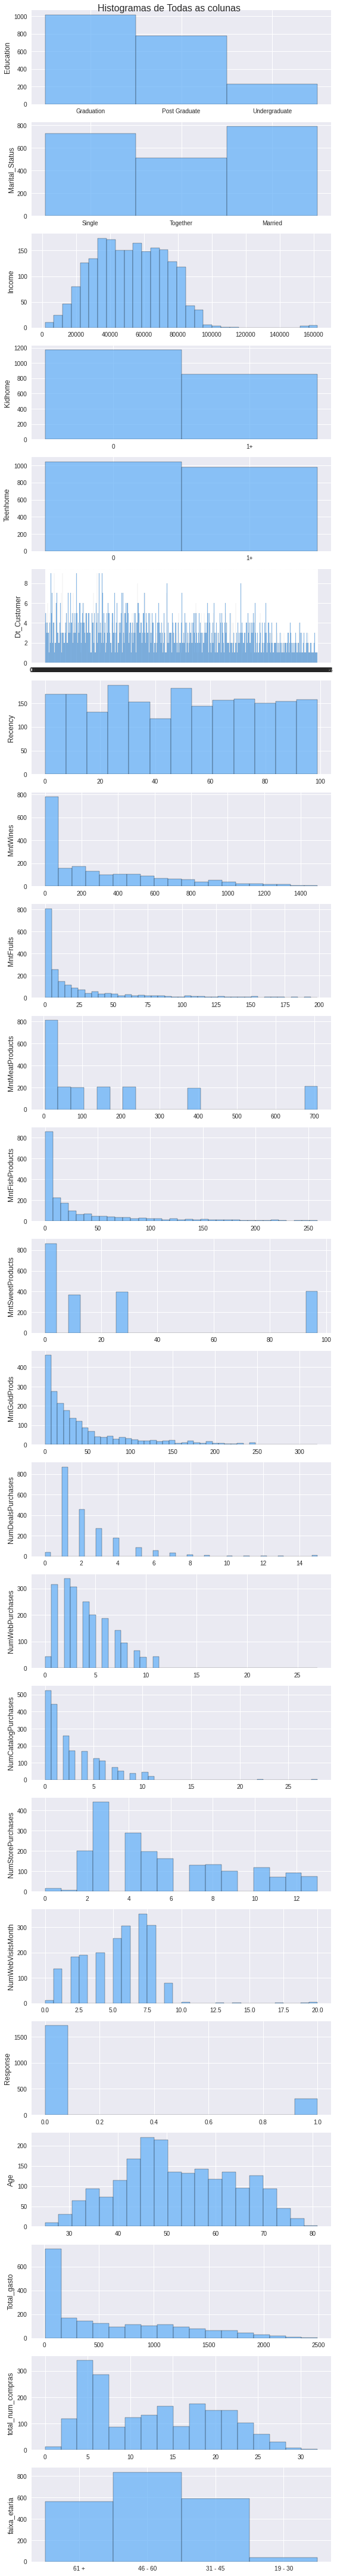

In [ ]:
columns = df.columns
plt.style.use('seaborn')
fig, axis = plt.subplots(len(columns), figsize = (8, 60))
for i, num_var in enumerate(columns):
    
    # hitograma de cada variavel, a coluna mais alta é a moda
    sns.histplot(x=num_var, data=df, ax = axis[i], color = '#68b2f8')
    
    axis[i].set_ylabel(f"{num_var}", fontsize = 12)
    axis[i].set_xlabel(None)

fig.suptitle('Histogramas de Todas as colunas', fontsize = 16, y = 1)
plt.tight_layout()

## Medidas de dispersão

In [ ]:
#visualiza algumas medidas de uma coluna específica
df.Income.describe()

count      2027.000000
mean      52062.289097
std       21600.620486
min        1730.000000
25%       35482.000000
50%       51537.000000
75%       68474.500000
max      162397.000000
Name: Income, dtype: float64

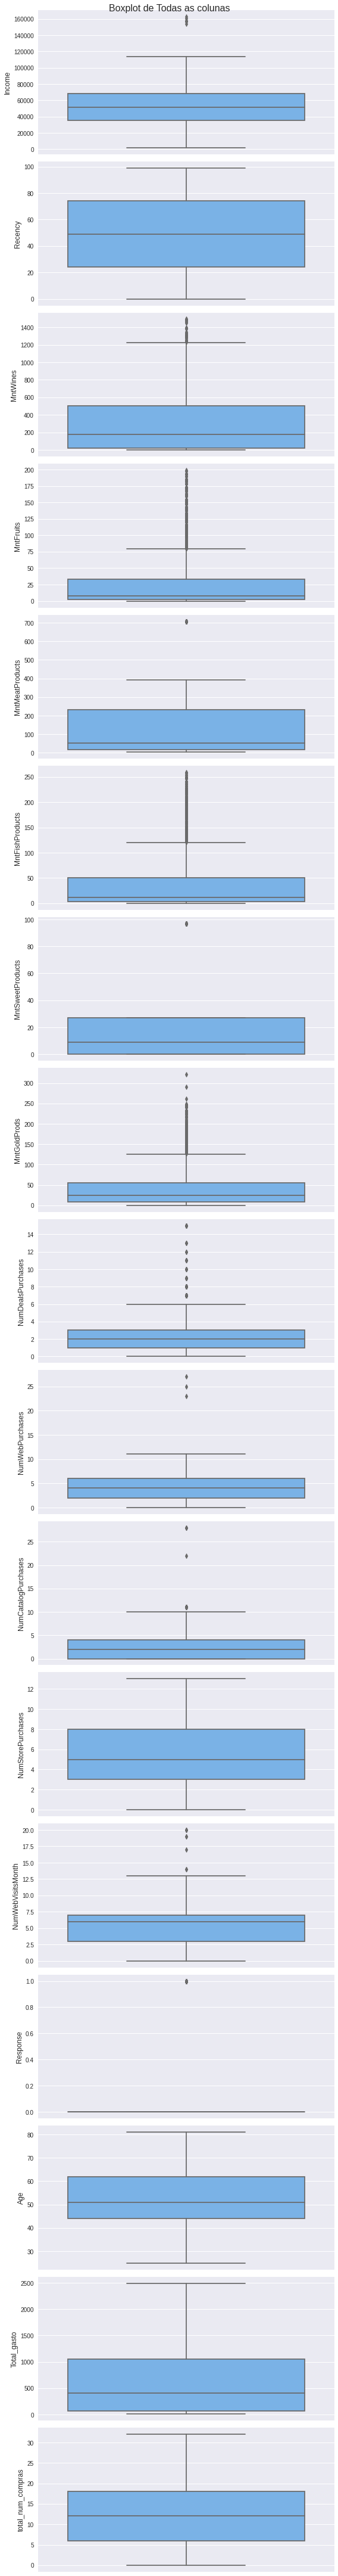

In [ ]:
# filtrando colunas quantitavivas
columns = [f for f in df.columns if df.dtypes[f] != 'object']

plt.style.use('seaborn')
fig, axis = plt.subplots(len(columns), figsize = (8, 60))
for i, num_var in enumerate(columns):
    
    # Boxplot de cada coluna
    sns.boxplot(y = num_var, data=df, ax = axis[i], color = '#68b2f8')
    
    axis[i].set_ylabel(f"{num_var}", fontsize = 12)
    axis[i].set_xlabel(None)

fig.suptitle('Boxplot de Todas as colunas', fontsize = 16, y = 1)
plt.tight_layout()

## Medidas de correlação

In [ ]:
df.corr()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age,Total_gasto,total_num_compras
Income,1.000000,0.002636,0.678985,0.502680,0.687934,0.515446,0.534920,0.375914,-0.109509,0.447707,0.691258,0.623820,-0.646398,0.161522,0.202344,0.776740,0.735617
Recency,0.002636,1.000000,0.010782,-0.012756,0.006461,-0.001867,0.024560,0.011141,0.011346,-0.005971,0.012843,-0.002114,-0.013228,-0.203435,0.014958,0.009843,0.002008
MntWines,0.678985,0.010782,1.000000,0.383791,0.591862,0.392488,0.431671,0.390073,0.013301,0.549256,0.625357,0.636127,-0.311943,0.239338,0.171218,0.898494,0.753180
MntFruits,0.502680,-0.012756,0.383791,1.000000,0.566111,0.591034,0.561728,0.398493,-0.136602,0.296648,0.483324,0.454496,-0.409725,0.129338,0.023832,0.609887,0.516311
MntMeatProducts,0.687934,0.006461,0.591862,0.566111,1.000000,0.603362,0.586574,0.382465,-0.152899,0.324561,0.696516,0.516079,-0.536758,0.247658,0.054517,0.856667,0.641957
MntFishProducts,0.515446,-0.001867,0.392488,0.591034,0.603362,1.000000,0.598605,0.423914,-0.140025,0.296462,0.525211,0.461367,-0.437758,0.104046,0.043473,0.643009,0.536465
MntSweetProducts,0.534920,0.024560,0.431671,0.561728,0.586574,0.598605,1.000000,0.366951,-0.116510,0.345237,0.527440,0.502965,-0.431282,0.138464,0.032585,0.639746,0.574839
MntGoldProds,0.375914,0.011141,0.390073,0.398493,0.382465,0.423914,0.366951,1.000000,0.059853,0.409835,0.436358,0.384421,-0.228202,0.156164,0.052123,0.531768,0.508954
NumDealsPurchases,-0.109509,0.011346,0.013301,-0.136602,-0.152899,-0.140025,-0.116510,0.059853,1.000000,0.231331,0.000091,0.061007,0.344591,-0.001739,0.058419,-0.071666,0.116297
NumWebPurchases,0.447707,-0.005971,0.549256,0.296648,0.324561,0.296462,0.345237,0.409835,0.231331,1.000000,0.376972,0.504388,-0.045806,0.148621,0.161572,0.529820,0.765190


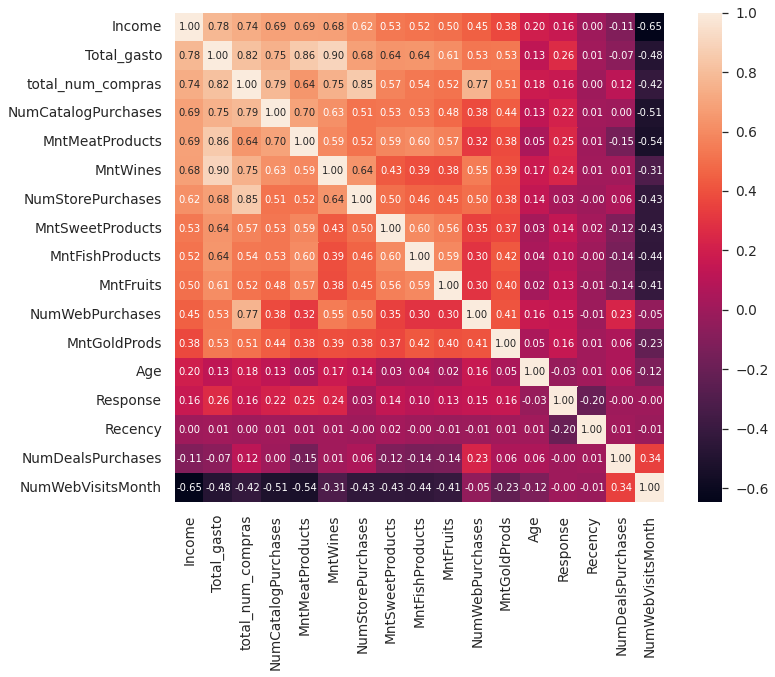

In [ ]:
# vizualização gráfica da matrix de correlação
k = len(df.columns)
cols = corrmat.nlargest(len(df.columns), 'Income')['Income'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Observações

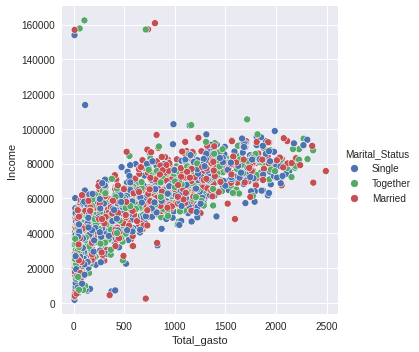

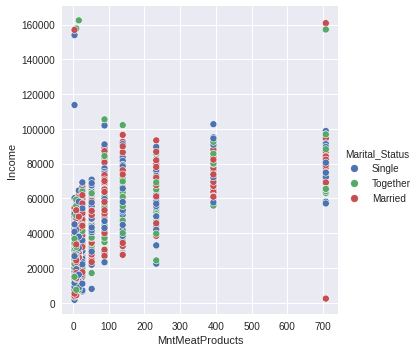

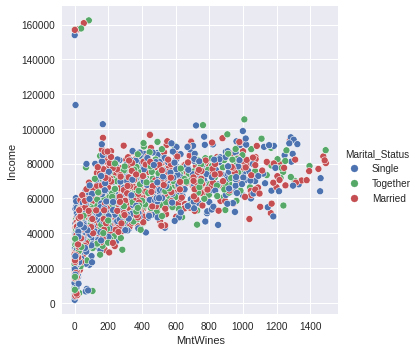

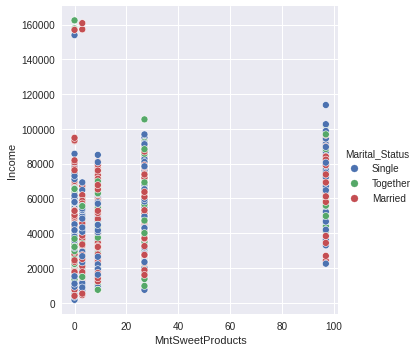

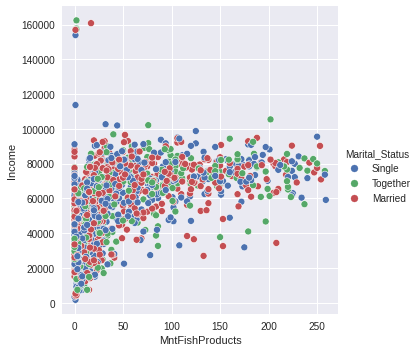

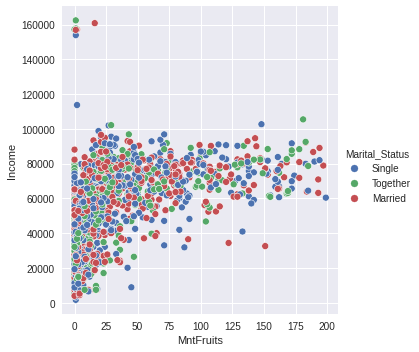

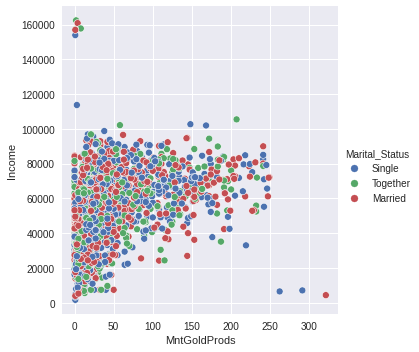

In [ ]:
# Relação da  Renda e estado civil com a quantia gasta pelos clientes
def plot(col):
  sns.relplot(x=col, y='Income', hue='Marital_Status', data=df)

cols = ['Total_gasto', 'MntMeatProducts', 'MntWines',  'MntSweetProducts', 
        'MntFishProducts', 'MntFruits', 'MntGoldProds']

for col in cols:
  plot(col)

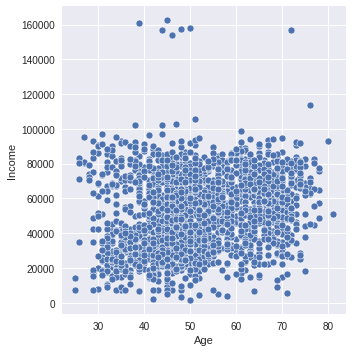

In [ ]:
# relação da idade com a renda do cliente
sns.relplot(x='Age', y='Income', data=df)

In [ ]:
# A idade média dos clientes é de 52 anos sendo a moda 45. Os dados estão bem espalhados, com desvio padrão de 11.6
print('Média',df.Age.mean())
print('Mediana',df.Age.median())
print('Moda',df.Age.mode())
print('Desvio padrão',df.Age.std())

Média 52.10902812037494
Mediana 51.0
Moda 0    45
dtype: int64
Desvio padrão 11.665689196744566


In [ ]:
# A maior parte dos clientes tem apenas graduação
df['Education'].value_counts().sort_values(ascending=False)

Graduation       1017
Post Graduate     778
Undergraduate     232
Name: Education, dtype: int64

In [ ]:
# o estado civil dos clientes é bem balanceado
df['Marital_Status'].value_counts().sort_values(ascending=False)

Married     788
Single      727
Together    512
Name: Marital_Status, dtype: int64

In [ ]:
# Mais da metade dos clientes não tem filhos em casa
df['Kidhome'].value_counts().sort_values(ascending=False)

0     1171
1+     856
Name: Kidhome, dtype: int64

In [ ]:
# A faixa etária de 46 a 60 anos é a que mas fez compras e a de 10 a 30 anos quase não fez compras
df['faixa_etaria'].value_counts().sort_values(ascending=False)

46 - 60    835
31 - 45    592
61 +       561
19 - 30     39
Name: faixa_etaria, dtype: int64

In [ ]:
# qual a idade media e estato civil dos clientes que não tem filhos
age_mean = df.query('Kidhome == "0"')['Age'].mean()
print(f'A idade média é de {age_mean:.0f} anos e o estado civíl segue a seguinte distribuição:')

df2 = pd.DataFrame(df.query('Kidhome == "0"').groupby(by=['Marital_Status'])['Marital_Status'].count())
df2.columns = ['count']
df2 = df2.reset_index()
df2


A idade média é de 55 anos e o estado civíl segue a seguinte distribuição:


,Marital_Status,count
0,Married,447
1,Single,435
2,Together,289


In [ ]:
# Comparação de renda com estado civil
pd.DataFrame(df.groupby(by='Marital_Status')['Income'].mean()).reset_index()

,Marital_Status,Income
0,Married,51890.417513
1,Single,52182.198074
2,Together,52156.548828


In [ ]:
# Comparação da renda com o nível de educação
pd.DataFrame(df.groupby(by='Education')['Income'].mean()).reset_index()


,Education,Income
0,Graduation,52354.073746
1,Post Graduate,54758.502571
2,Undergraduate,41741.603448
